## **QUESTION** **1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import matplotlib.gridspec as gspec

name, age, depth = np.loadtxt("/content/drive/MyDrive/MOR_data.txt", unpack = True, dtype = np.dtype([('name', 'U13'), ('age', 'f8'), ('depth', 'f8')])) #loading in data




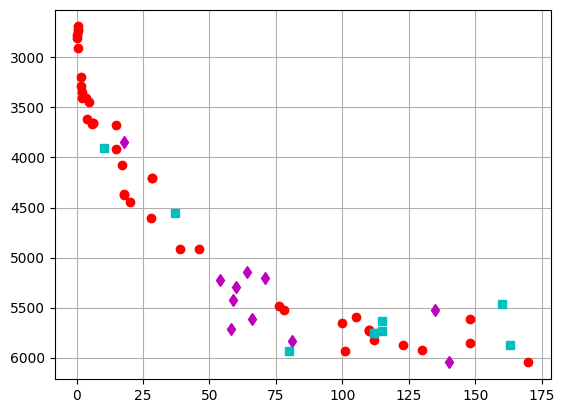

In [ ]:
plt.plot(age[name =='EPR'], depth[name =='EPR'], 'or', label = 'EPR Data') #assigning tags to plot in different colors
plt.plot(age[name =='CIR'], depth[name =='CIR'], 'dm', label = 'CIR Data')
plt.plot(age[name =='MAR'], depth[name =='MAR'], 'sc', label = 'MAR Data')
plt.gca().invert_yaxis() #axis invert
plt.grid()

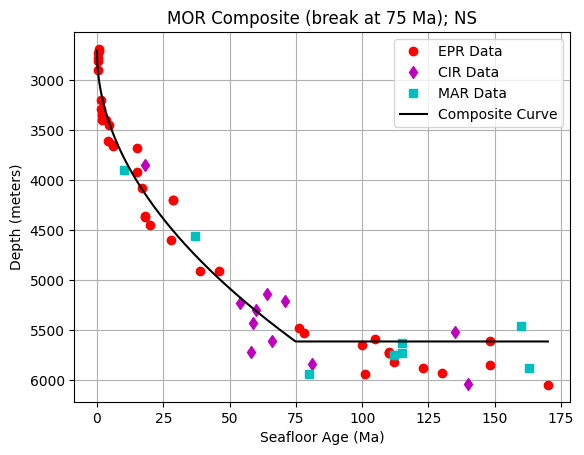

In [ ]:
def bath_break(t, depth, t_break):
    """
    Input:
    age (t),
    depth
    age break (t_break)

    Output:
    m_best: slope
    b_best = intercept

    Almost all of it from week 2 and 3 lectures

    depth = m*age^1/2 +b
    taking a = age^1/2
    depth = ma + b (linearized)
    """
     #Boolean Array:
    smootht = np.linspace(0, age.max(), 1000)
    LV = t<=t_break #boolean 1 for curve
    LV2 = smootht<=t_break #boolean 2 for line really tried doing it with only one boolean

    m_best,b_best = np.polyfit(np.sqrt(t[LV]), depth[LV], 1 ) #polyfit using logic stated above

    depth_best = np.where(LV2, m_best * np.sqrt(smootht) + b_best, 0)  # exponential before 75 Ma
    depth_best = np.where(~LV2, depth_best[LV2][-1], depth_best)
    #unfotunately the two lines were impossible to write in one line using np.where for me
    return depth_best, smootht, m_best, b_best

#sorting is important as otherwise raph looks pretty bad and it keeps looping over the values
sortedindices = np.argsort(age)
# argsort is used from stackoverflow page
#https://stackoverflow.com/questions/17901218/numpy-argsort-what-is-it-doing
sortedage = age[sortedindices]
sorteddepth = depth[sortedindices]

#print("Sorted Age:", sorted_age)
#print("Sorted Depth:", sorted_depth)

d,a,m_best, b_best = bath_break(sorted_age,sorted_depth, 75)

#print(d)
# plotting data
plt.figure()
plt.plot(age[name =='EPR'], depth[name =='EPR'], 'or', label = 'EPR Data')
plt.plot(age[name =='CIR'], depth[name =='CIR'], 'dm', label = 'CIR Data')
plt.plot(age[name =='MAR'], depth[name =='MAR'], 'sc', label = 'MAR Data')

plt.plot(a, d, color = 'black', label='Composite Curve')
plt.xlabel('Seafloor Age (Ma)')
plt.ylabel('Depth (meters)')
plt.legend()
plt.title('MOR Composite (break at 75 Ma); NS')
plt.gca().invert_yaxis() #inverting y axis
plt.grid(True)
plt.show()


## **QUESTION 2**

<ipython-input-136-0ae1f959e34f>:67: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


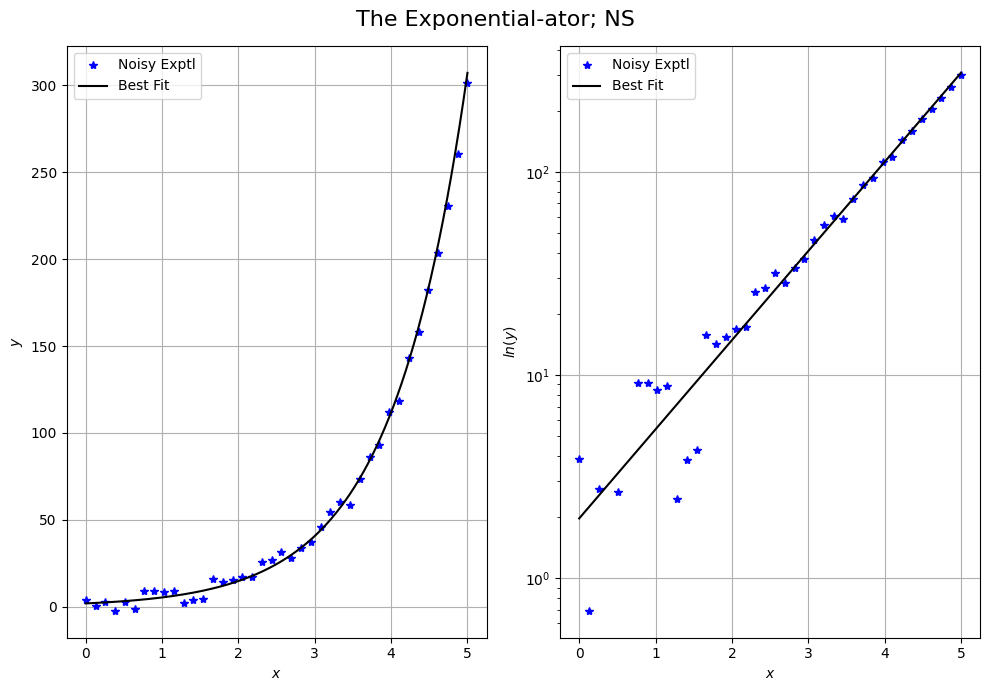

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def noisyexptl_data(x,b,m, A): # udf 1 to generate noisy data
    '''
    Input:

    x: data
    b: intercept
    m: slope
    A: noise scaling factor


    Output:
    noisyy: noisy exponential array
    '''
    noise = np.random.uniform(-1, 1, size=len(x))
    noisyy = b*np.exp(m*x) + A*noise

    return noisyy

# UDF for Exponential Curve Fitting
def exptlator(xx, yy):
    '''
    Input:

    xx: horizontal values
    yy: vertical values

    Output:
    m: slope of best fit
    b: intercept of best fit

    yy = be^(m*xx)
    taking log e on both sides
    log yy = log(be^(mxx))
    log yy = mxx+log b
    yynew = mxx + bnew
    '''
    LV = (yy<=0)
    xx = xx[~LV]
    yy = yy[~LV]
    fit = np.polyfit(xx,np.log(yy), 1)
    #trying out if it retuns an array and how to assign m and b
    m = fit[0]
    b = np.exp(fit[1])
    return m,b


# UDF to Fit Synthetic Exponential Data and Plot
def plotter():
    # Generate synthetic data

    x = np.linspace(0, 5 , 40)
    y = noisyexptl_data(x, 2, 1, 6)

    smoothx = np.linspace(0,5,10000) #smoothing array
    m,b = exptlator(x,y)
    y_fit = b*np.exp(smoothx*m)
    plt.figure(figsize = (10,7))

    plt.grid()

    plt.suptitle("The Exponential-ator; NS", fontsize = 16)
    #exponetial plot:
    plt.subplot(1,2,1)
    plt.plot(x,y,'*b', label = "Noisy Exptl") #data
    plt.plot(smoothx,y_fit,'-k', label = "Best Fit") # best fit
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.legend()
    plt.grid()
    #linear plot 2:
    plt.subplot(1,2,2)
    plt.semilogy(x,y,'*b', label = "Noisy Exptl") #data
    plt.semilogy(smoothx,y_fit,'-k', label = "Best Fit") #best fit
    plt.xlabel(r"$x$")
    plt.ylabel(r"$ln(y)$")
    plt.legend()
    plt.grid()
    plt.tight_layout()


plotter()

## **QUESTION 3**

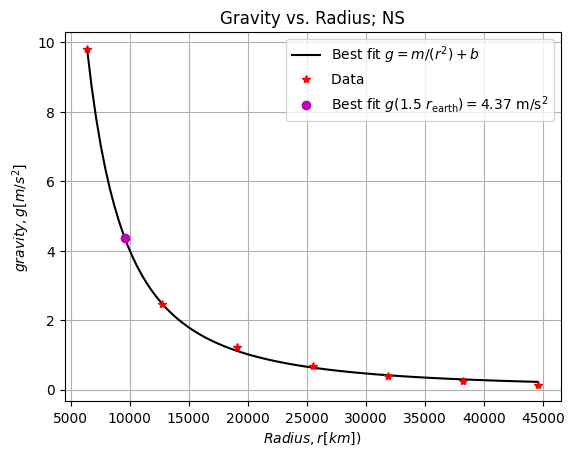

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Step 1: Load the Data
radius, grav = np.loadtxt("/content/drive/MyDrive/RadiusGravity.txt", unpack = True) #loading data

#print(grav)

def gravity(radius, G, M):
    '''
    Input:
    Radius: radius array
    G = polyfit intercept
    M = slope

    Output:
    gbest: gravitational bestfit

    logic: g = M/R^2 + G

    rnew = 1/R^2
    gnew = M*rnew + G
    '''
    gbest = M / (radius ** 2) + G

    return gbest

M, G= np.polyfit(1/(radius**2), grav, 1) # polyfit logic in gravity function

#print(G)
#print(M)

smoothr = np.linspace(min(radius), max(radius), 100) # smoother radius
gfit = gravity(smoothr, G, M) #calling function for best fit
#print(gfit)
plt.plot(smoothr, gfit, 'k', label=r'Best fit $g = m/(r^2) +b$') # plotting best fit

plt.plot(radius, grav, '*r', label = r'Data ')

ronepointfive = 1.5 * 6371 # 1.5 radius of earth
gronepointfive = gravity(ronepointfive, G, M) # calling function to determine g value at ronepointfive

plt.xlabel(r'$Radius, r[km])$')
plt.ylabel(r'$gravity, g [m/s^2]$')
plt.title('Gravity vs. Radius; NS')
plt.plot(ronepointfive, gronepointfive, 'om', label= r'$\mathrm{{Best\ fit\ }} g(1.5\ r_\mathrm{{earth}}) = {:.2f}\ \mathrm{{m/s^2}}$'.format(gronepointfive)) #mathrm is from gpt

plt.grid(True)
plt.legend()




## **QUESTION 4**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from scipy.optimize import curve_fit


data = scipy.io.loadmat('/content/drive/MyDrive/MCdata.mat') #loading data

#assinging variables
Ch = data['Ch']
Ra = data['Ra']
Nu = data['Nu']

print(Ch)
sortedindices = np.argsort(Ch[0])
#had to sort so that later when i am trying to figure out the ranges it is easier for the eye
sortedCh = Ch[0][sortedindices]
print(sortedCh)







[[ 935000.  940000.  946000.  280000.  990000.  954000.  954000.  281000.
   283000.  957000.   93500.  285000.   93900.  967000.  285000.   46800.
    94300.   47000.   94900.   47200.   94800.       0.    9460.       0.
     9500.   47500.       0.   94700.    9540.   47400.       0. 1020000.
     9600.       0.    9580.   95300.       0.    9580.       0.       0.
  1240000.       0.       0.       0.    9740.       0.       0.   99600.
        0.       0.   10100.       0.       0.       0.       0.       0.
        0.]]
[      0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.       0.       0.       0.
       0.       0.       0.       0.       0.    9460.    9500.    9540.
    9580.    9580.    9600.    9740.   10100.   46800.   47000.   47200.
   47400.   47500.   93500.   93900.   94300.   94700.   94800.   94900.
   95300.   99600.  280000.  281000.  283000.  285000.  285000.  935000.
  940000.  946000.  954000.  95

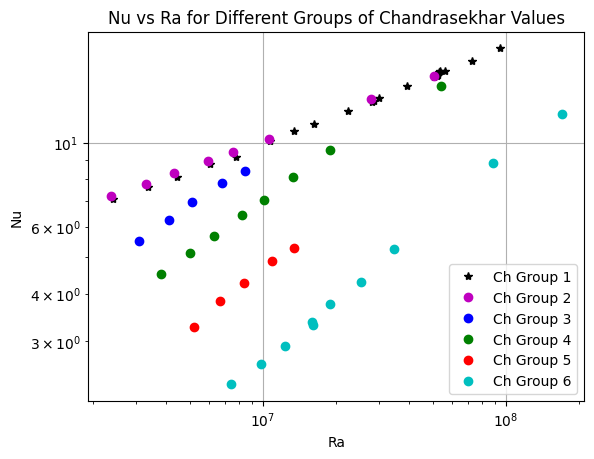

In [ ]:
#manually sorting the data
LV = [Ch ==0, (Ch>0)&(Ch<11000), (Ch>11000)&(Ch<50000), (Ch>50000)&(Ch<100000), (Ch>100000)&(Ch<290000), (Ch>290000)] #boolean list
marker = ['*k', 'om', 'ob', 'og', 'or', 'oc'] # marker list
line = ['k', 'm', 'b', 'g', 'r', 'c'] # line color list
for i in range(len(LV)): # baby loop to check
    ra = Ra[LV[i]] # assigning ra and nu according to the boolean being used
    nu = Nu[LV[i]]
    plt.loglog(ra, nu, marker[i], label=f'Ch Group {i+1}') # plotting the same to check

# Set plot properties
plt.xlabel('Ra')
plt.ylabel('Nu')
plt.title('Nu vs Ra for Different Groups of Chandrasekhar Values')
plt.legend()
plt.grid(True)


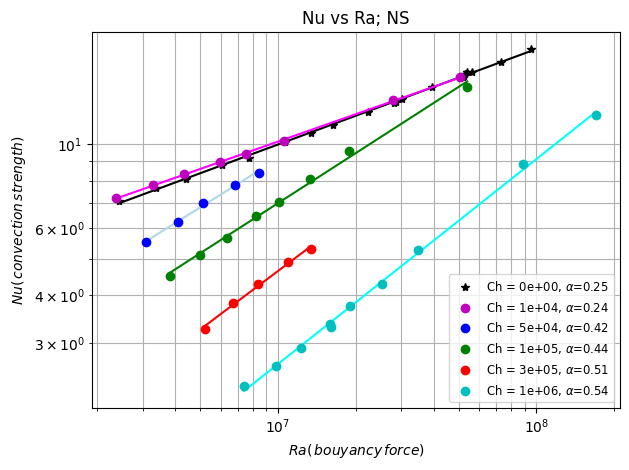

In [ ]:

for i in range(len(LV)): # mega loop for generating everything; 6 iterations
    ra = Ra[LV[i]] # assigning ra and nu according to the boolean being used
    nu = Nu[LV[i]]


    ch_mean = np.mean(Ch[LV[i]]) # calculating respective mean value
    def power(x, y):
        '''
        Inputs:
        x:horizontal array
        y: vertical array

        Outputs:
        bestfit: bestfit y values
        smoothRa: bestfit Ra values or x values
        m = alpha - best fit exponential value

        logic: taking log e on both sides of Nu = cRa^m
        log Nu = logc + mlogRa
        Nunew = newc + m*newRa (linearized)

        '''

        m,c = np.polyfit(np.log(x), np.log(y), 1)

        smoothRa = np.linspace(min(x), max(x), 100)

        bestfit = np.exp(c)*smoothRa**m

        return bestfit, smoothRa, m

    bestfit, smoothRa, m = power(ra, nu) # calling power to get bestfit values

    plt.loglog(smoothRa, bestfit, line[i]) # plotting best fit lines first
    plt.loglog(ra, nu, marker[i], label=r'Ch = {:.0e}, $\alpha$={:.2f}'.format(ch_mean, m)) # plotting marker values (raw data)

# Set plot properties
plt.xlabel('$Ra(\, bouyancy\, force)$')
plt.ylabel('$Nu(\, convection\, strength)$')
plt.title('Nu vs Ra; NS')
plt.legend(fontsize='small')
plt.grid(True, which = 'Both') # which= both form CHATGPT for nicer grid
plt.tight_layout()


## **QUESTION 5**

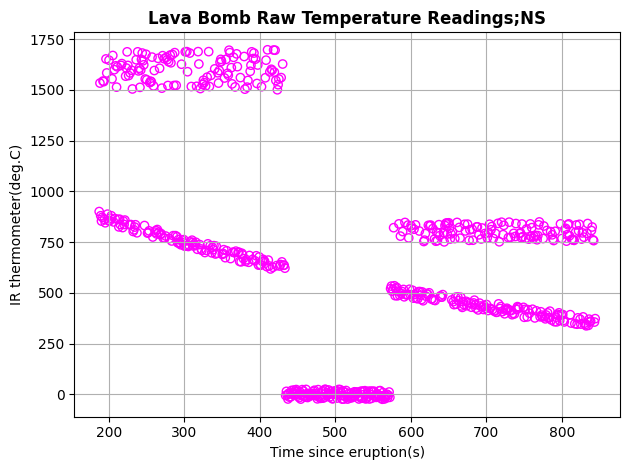

In [ ]:
time, temp = np.loadtxt("/content/drive/MyDrive/LavaBomb.txt", unpack = True, dtype = float, skiprows = 1) #loading data

plt.scatter(time, temp,color='magenta',edgecolor='magenta', facecolor='none', marker='o' , label = 'Raw Data')
# the hollow circles are courtesy of perplexity.ai
plt.xlabel("Time since eruption(s)")
plt.ylabel("IR thermometer(deg.C)")
plt.title('Lava Bomb Raw Temperature Readings;NS', fontweight='bold')
plt.grid()
plt.tight_layout()

i mean wow


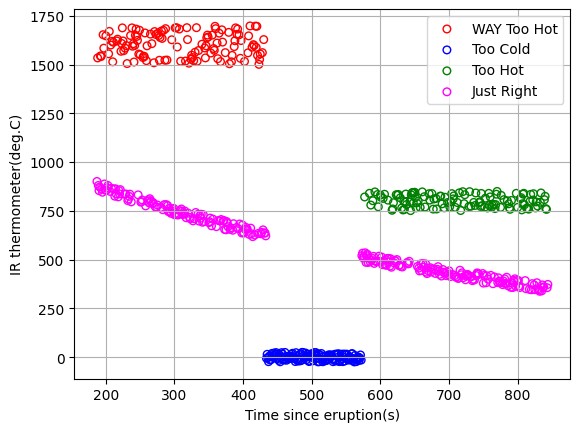

In [ ]:
#assiging boolean arrays; eyeballed
waytoohot = temp > 1400
toocold = temp < 25
toohot = (temp>720) & (time > 500)
justright = ~waytoohot & ~toocold & ~toohot

conditions = [waytoohot, toocold, toohot, justright] # boolean list very useful
colors = [ 'red', 'blue', 'green','magenta'] # color list
labels = [ 'WAY Too Hot', 'Too Cold', 'Too Hot','Just Right'] #legend list


for condition, color, label in zip(conditions, colors, labels): #loop for plotting data
    plt.scatter(time[condition], temp[condition], color=color, edgecolor=color,facecolor='none', marker='o', label=label, s=30)

# Set plot properties

plt.xlabel("Time since eruption(s)")
plt.ylabel("IR thermometer(deg.C)")
plt.legend()
print("i mean wow")
# Show the plot
plt.grid(True)
plt.show()

Smack 1 434.2
Smack2 573.2


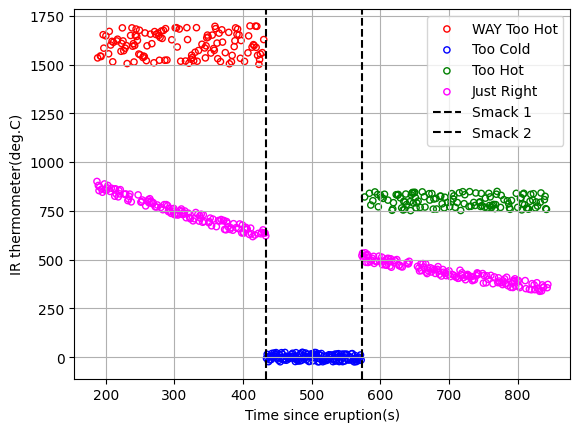

In [ ]:
for i in range(1, len(temp)):
# for loop for seeing at what time ---> just right to too cold occurs
    if justright[i-1] and toocold[i]:
    # if one before is justright and the value we're on is too cold yay
        transitiontime1 = time[i]


print("Smack 1", transitiontime1)

#same logic but other way round
for i in range(1, len(temp)):
    if justright[i] and toocold[i-1]:
        transitiontime2 = time[i]


print("Smack2", transitiontime2)

for condition, color, label in zip(conditions, colors, labels):
    plt.scatter(time[condition], temp[condition], color=color, edgecolor=color,
                facecolor='none', marker='o', label=label, s=20)
plt.axvline(x=transitiontime1, color='black', linestyle='--', label = 'Smack 1') # plotting smack lines
plt.axvline(x=transitiontime2, color='black', linestyle='--', label = 'Smack 2')
# Set plot properties
plt.xlabel("Time since eruption(s)")
plt.ylabel("IR thermometer(deg.C)")

plt.legend()

# Show the plot
plt.grid(True)
plt.show()



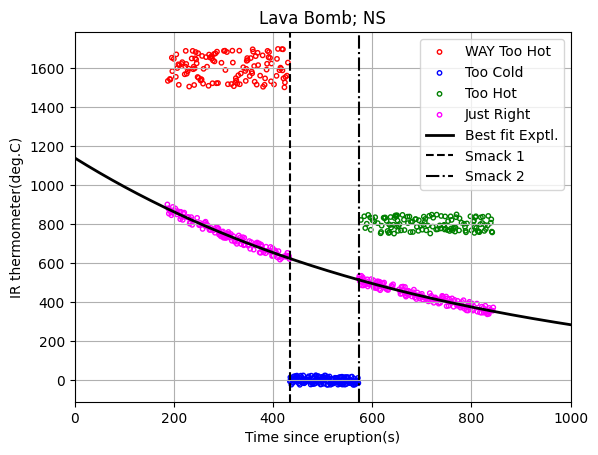

In [ ]:
def exp(x, y):
  '''
  Input:
  x: horizontal array
  y: vertical array

  Output:
  bestfit: y best fit
  smootht: x best fit
  similar to previous questions' logic:
  T = T1 e^(-t/tau) taking log e on both sides
  log T = logT1 + -t/tau
  newT = newT1 - t* (newtau)
  '''

  tau,T1 = np.polyfit(x, np.log(y), 1)

  T1 = np.exp(T1)

  smootht = np.linspace(0,1000, 2000)
  bestfit = T1*np.exp(smootht*tau)
  return bestfit, smootht

bestfit, smootht = exp(time[justright], temp[justright])
# calling exp function but just using values from just_right using boolean operation

for condition, color, label in zip(conditions, colors, labels):
   # plotting everything using indices of boolean list before
    plt.scatter(time[condition], temp[condition], color=color, edgecolor=color,
                facecolor='none', marker='o', label=label, s=10)
plt.plot(smootht, bestfit, color = 'black', label = 'Best fit Exptl.',  linewidth=2)
plt.axvline(x=transitiontime1, color='black', linestyle='--', label = 'Smack 1') # plotting smack lines
plt.axvline(x=transitiontime2, color='black', linestyle='-.', label = 'Smack 2')

plt.xlim(0,1000)
plt.yticks(np.arange(0, 1800, 200)) # neater
plt.xlabel("Time since eruption(s)")
plt.ylabel("IR thermometer(deg.C)")
plt.title('Lava Bomb; NS')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
